In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np


In [2]:

X = pd.read_csv('../tables/final_table.csv')
y = X['Result']
y = y.map(lambda p: (np.sign(p)+1)/2)
X.drop('Result', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
param_grid = {
    "hidden_layer_sizes":[[20]],
    "solver":["adam"],
    "activation":["relu"],
    "learning_rate":["invscaling"],
    "max_iter":[1000]
}
ann_model = MLPClassifier()
grid_search = GridSearchCV(ann_model,param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)
best_ann = MLPClassifier(**grid_search.best_params_)
# X.drop(X.columns.difference(['Result', 'Vis_Difference', 'Hm_Difference', 'Vis_Average_Points', 'Vis_Losses', 'Last_same_game', 'Hm_Losses', 'Vis_Wins', 'Hm_Wins', 'Hm_Average_Points', 'Vis_3PAr', 'Vis_TPA', 'Vis_TP', 'Hm_3PAr', 'Vis_wPA', 'Hm_TPA', 'Hm_wPA', 'Hm_TP', 'Hm_wP',
#  'Vis_wP', 'Hm_DRB%', 'Vis_DRB%', 'Hm_FT', 'Hm_FTA', 'Hm_ORB%', 'Vis_ORB%']), axis=1, inplace=True)
print(grid_search.best_score_)
print(grid_search.best_params_)

C:\Users\mayan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


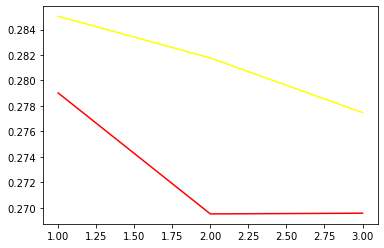

In [ ]:
plt.plot(rng_list, y_error, 'yellow')
plt.plot(rng_list, y_check, 'red')
plt.show()

In [ ]:
neurons_counts = np.linspace(10, 50, 3)
print(neurons_counts)
train_scores = list()
test_scores = list()
for count in neurons_counts:

    mlp_class = MLPClassifier(
        hidden_layer_sizes=(int(count), int(count/2)),
        solver='adam',
        activation='relu',
        learning_rate="invscaling",
        max_iter=1000)
    
    mlp_class.fit(X_train, y_train)
    train_scores.append(1 - mlp_class.score(X_train, y_train))
    test_scores.append(1 - mlp_class.score(X_test, y_test))
    print(f"{count} done!")

In [4]:
mlp_class = MLPClassifier(
        hidden_layer_sizes=([20]),
        solver='adam',
        activation='relu',
        learning_rate="invscaling",
        max_iter=1000)
mlp_class.fit(X_train, y_train)
print(mlp_class.score(X_test, y_test))
print(mlp_class.score(X_train, y_train))

0.7232556250507676
0.7468388703869169


In [ ]:
plt.plot(neurons_counts, train_scores)

In [ ]:
plt.plot(neurons_counts, test_scores)